In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import calendar
import seaborn as sns
from scipy.stats import linregress
import hvplot.pandas

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Study data file
sales_data_path = "C:/Users/cghos/Desktop/group-project/project1_saledata.csv"

# Read the data 
sales_data = pd.read_csv(sales_data_path)
sales_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
0,102001,0,United States,country,NaN,180000.0,185000.0,185000.0,187110.0,193000.0,...,330000.0,345000.0,360000.0,365000.0,365000.0,355000.0,349000.0,341307.0,335000.0,329000.0
1,394913,1,"New York, NY",msa,NY,404920.0,399000.0,399451.0,400000.0,405000.0,...,516500.0,525000.0,540000.0,546500.0,570000.0,585000.0,580000.0,560000.0,540000.0,534450.0
2,753899,2,"Los Angeles, CA",msa,CA,505000.0,495000.0,500000.0,490000.0,482000.0,...,865000.0,900000.0,935000.0,934000.0,915000.0,890000.0,878000.0,865000.0,853250.0,850000.0
3,394463,3,"Chicago, IL",msa,IL,239000.0,237500.0,240000.0,240000.0,250000.0,...,270000.0,280000.0,300000.0,306000.0,315000.0,310000.0,300000.0,285000.0,279000.0,280000.0
4,394514,4,"Dallas, TX",msa,TX,137000.0,144500.0,143500.0,145874.0,154900.0,...,368000.0,387000.0,415000.0,425000.0,424167.0,410000.0,400000.0,388000.0,385000.0,375000.0


In [4]:
# Separating the data by cities
Seattle_df=sales_data[sales_data["RegionName"] == "Seattle, WA"]
Seattle_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
15,395078,15,"Seattle, WA",msa,WA,334990.0,330000.0,337000.0,336950.0,335000.0,...,653000.0,706000.0,740000.0,750000.0,720000.0,680000.0,665000.0,660000.0,669950.0,630000.0


In [5]:
Tampa_df=sales_data[sales_data["RegionName"] == "Tampa, FL"]
Tampa_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
18,395148,18,"Tampa, FL",msa,FL,167346.0,170750.0,168000.0,173000.0,175000.0,...,335000.0,350000.0,357550.0,375000.0,386000.0,380000.0,370000.0,360000.0,368000.0,355000.0


In [6]:
San_Jose_df = sales_data[sales_data["RegionName"] == "San Jose, CA"]
San_Jose_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
35,395059,35,"San Jose, CA",msa,CA,692500.0,705000.0,695000.0,700000.0,680000.0,...,1400000.0,1510000.0,1550000.0,1513500.0,1465000.0,1390000.0,1350000.0,1320000.0,1325000.0,1301000.0


In [7]:
Phoenix_df = sales_data[sales_data["RegionName"] == "Phoenix, AZ"]
Phoenix_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
10,394976,10,"Phoenix, AZ",msa,AZ,227000.0,225000.0,227000.0,226000.0,225000.0,...,452000.0,469000.0,475100.0,491000.0,490000.0,470000.0,457499.0,449450.0,449000.0,430000.0


In [8]:
Austin_df = sales_data[sales_data["RegionName"] == "Austin, TX"]
Austin_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
29,394355,29,"Austin, TX",msa,TX,180500.0,185000.0,186000.0,189998.0,192000.0,...,505750.0,545000.0,565000.0,585250.0,560000.0,525000.0,512875.0,497500.0,483662.0,475000.0


In [9]:
# Create a dictionary containing coordinates
coordinates = {
    "latitude": [47.6062, 37.3387, 33.4484, 27.9506, 30.2672],
    "longitude": [-122.3321, -121.8853, -112.0740, -82.4572, -97.7431],
    "City": ["Seattle", "San Jose", "Phoenix", "Tampa", "Austin"],
}

In [10]:
# Create a Pandas DataFrame containing coordinates
coordinates_df = pd.DataFrame(coordinates)

# Display sample data
coordinates_df

,latitude,longitude,City
0,47.6062,-122.3321,Seattle
1,37.3387,-121.8853,San Jose
2,33.4484,-112.0740,Phoenix
3,27.9506,-82.4572,Tampa
4,30.2672,-97.7431,Austin


In [11]:
# Configure the map plot_2
map_plot_2 = coordinates_df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    color = "City",
    s = 200,
    xlabel = "Longitude",
    ylabel = "Latitude"
)

# Display the map plot
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (City)

In [12]:
# Combining the data for all the cities
combined_cities_1 = pd.concat([Seattle_df, Tampa_df,
                              San_Jose_df, Phoenix_df, 
                             Austin_df]) 
combined_cities_1.reset_index(inplace=True)

In [13]:
combined_cities_1.columns

Index(['index', 'RegionID', 'SizeRank', 'RegionName', 'RegionType',
       'StateName', '2008-02-29', '2008-03-31', '2008-04-30', '2008-05-31',
       ...
       '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
       '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30'],
      dtype='object', length=184)

In [14]:
# Drop the not needed columns
update_combined_cities_1 = combined_cities_1.drop (columns = ["index","RegionID","SizeRank","RegionType","StateName"])
update_combined_cities_1.set_index("RegionName", inplace=True)
update_combined_cities_1

,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
RegionName,,,,,,,,,,,,,,,,,,,,,
"Seattle, WA",334990.0,330000.0,337000.0,336950.0,335000.0,332500.0,329725.0,316500.0,319540.0,303485.0,...,653000.0,706000.0,740000.0,750000.0,720000.0,680000.0,665000.0,660000.0,669950.0,630000.0
"Tampa, FL",167346.0,170750.0,168000.0,173000.0,175000.0,173000.0,167100.0,165000.0,155000.0,150000.0,...,335000.0,350000.0,357550.0,375000.0,386000.0,380000.0,370000.0,360000.0,368000.0,355000.0
"San Jose, CA",692500.0,705000.0,695000.0,700000.0,680000.0,650000.0,615000.0,600000.0,560000.0,515000.0,...,1400000.0,1510000.0,1550000.0,1513500.0,1465000.0,1390000.0,1350000.0,1320000.0,1325000.0,1301000.0
"Phoenix, AZ",227000.0,225000.0,227000.0,226000.0,225000.0,214250.0,210000.0,200000.0,200000.0,190000.0,...,452000.0,469000.0,475100.0,491000.0,490000.0,470000.0,457499.0,449450.0,449000.0,430000.0
"Austin, TX",180500.0,185000.0,186000.0,189998.0,192000.0,190000.0,190000.0,179250.0,178000.0,179925.0,...,505750.0,545000.0,565000.0,585250.0,560000.0,525000.0,512875.0,497500.0,483662.0,475000.0


In [15]:
#creating loop to get data for the studied years

combined_cities_list = []

for year in range(2015, 2023):
    possible_short_names = [f'{year}-{month:02d}'
                            for month in range(1, 13)]

    year_columns = [full_name
                    for full_name in update_combined_cities_1.columns
                    if full_name[:7] in possible_short_names]

    year_columns = ['RegionName'] + year_columns
    combined_cities_list.append(combined_cities_1[year_columns])
    
combined_cities_list


[     RegionName  2015-01-31  2015-02-28  2015-03-31  2015-04-30  2015-05-31  \
 0   Seattle, WA    311860.0    311000.0    330000.0    340000.0    349719.0   
 1     Tampa, FL    145000.0    149200.0    155000.0    158000.0    165000.0   
 2  San Jose, CA    667500.0    713250.0    773500.0    789000.0    825000.0   
 3   Phoenix, AZ    199000.0    200000.0    205000.0    206000.0    215000.0   
 4    Austin, TX    237000.0    238000.0    246000.0    259000.0    267650.0   
 
    2015-06-30  2015-07-31  2015-08-31  2015-09-30  2015-10-31  2015-11-30  \
 0    359990.0    345000.0    350000.0    342600.0    340681.0    336000.0   
 1    170000.0    172500.0    164900.0    165500.0    164900.0    160000.0   
 2    838000.0    840000.0    831000.0    790000.0    795000.0    800000.0   
 3    215000.0    214900.0    212000.0    215000.0    215000.0    212950.0   
 4    265000.0    261000.0    255000.0    248000.0    250000.0    254450.0   
 
    2015-12-31  
 0    338000.0  
 1    167000.0

In [16]:
# tarnsposing the dataframe
combined_cities_2 = update_combined_cities_1.transpose()
combined_cities_2.head(10)

RegionName,"Seattle, WA","Tampa, FL","San Jose, CA","Phoenix, AZ","Austin, TX"
2008-02-29,334990.0,167346.0,692500.0,227000.0,180500.0
2008-03-31,330000.0,170750.0,705000.0,225000.0,185000.0
2008-04-30,337000.0,168000.0,695000.0,227000.0,186000.0
2008-05-31,336950.0,173000.0,700000.0,226000.0,189998.0
2008-06-30,335000.0,175000.0,680000.0,225000.0,192000.0
2008-07-31,332500.0,173000.0,650000.0,214250.0,190000.0
2008-08-31,329725.0,167100.0,615000.0,210000.0,190000.0
2008-09-30,316500.0,165000.0,600000.0,200000.0,179250.0
2008-10-31,319540.0,155000.0,560000.0,200000.0,178000.0
2008-11-30,303485.0,150000.0,515000.0,190000.0,179925.0


In [17]:
# droping the rows not required
transposed_cities = combined_cities_2.drop(index=combined_cities_2.index[:-95])
transposed_cities

RegionName,"Seattle, WA","Tampa, FL","San Jose, CA","Phoenix, AZ","Austin, TX"
2015-01-31,311860.0,145000.0,667500.0,199000.0,237000.0
2015-02-28,311000.0,149200.0,713250.0,200000.0,238000.0
2015-03-31,330000.0,155000.0,773500.0,205000.0,246000.0
2015-04-30,340000.0,158000.0,789000.0,206000.0,259000.0
2015-05-31,349719.0,165000.0,825000.0,215000.0,267650.0
...,...,...,...,...,...
2022-07-31,680000.0,380000.0,1390000.0,470000.0,525000.0
2022-08-31,665000.0,370000.0,1350000.0,457499.0,512875.0
2022-09-30,660000.0,360000.0,1320000.0,449450.0,497500.0
2022-10-31,669950.0,368000.0,1325000.0,449000.0,483662.0


In [18]:
# # lines = combined_cities_2.plot()
# transposed_cities.plot(figsize=(15, 10), ylim=(100000,1600000))
# plt.title('Price over time')
# plt.xlabel('Year')
# plt.ylabel('Price')
# plt.show()

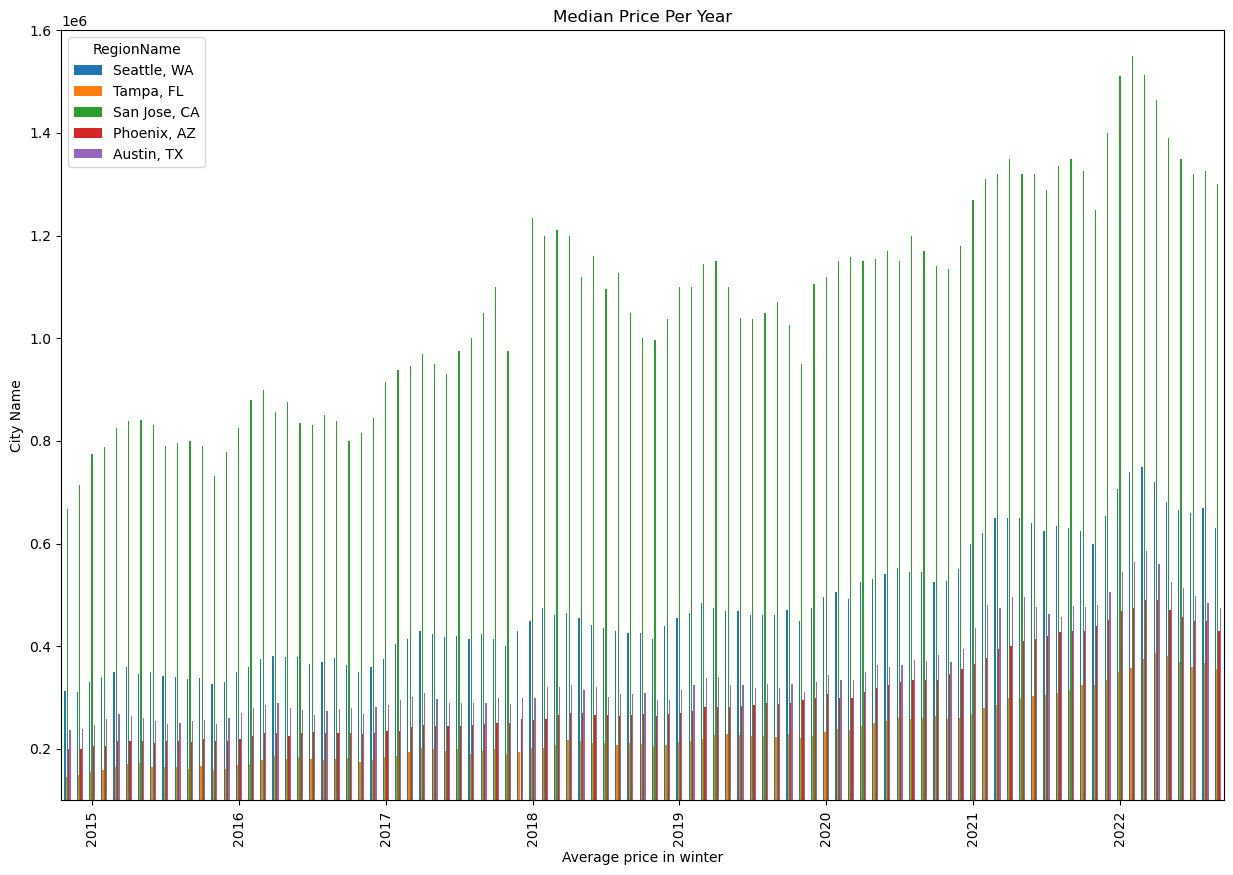

In [19]:
# bar for the whole data
ax = transposed_cities.plot(kind="bar", figsize=(15, 10),  ylim=(100000,1600000))
ax.set_xticks([2, 14, 26, 38, 50, 62, 74, 86])
ax.set_xticklabels(["2015","2016", "2017", "2018", "2019", "2020", "2021", "2022"])
# ax.set_yticks([5, 15, 25, 35, 45])
# ax.set_yticklabels(['100000', '400000', '700000', '1000000', '1300000'])
plt.title("Median Price Per Year")
plt.ylabel("City Name")
plt.xlabel("Average price in winter")
plt.show()


In [ ]:
#checking for missing data
#transposed_cities.isna()

In [20]:
# Summer data
combined_cities_list_summer = []

for year in range(2015, 2023):
    possible_short_names_2 = [f'{year}-{month:02d}'
                            for month in range(6, 9)]

    year_columns_2 = [full_name_2
                    for full_name_2 in update_combined_cities_1.columns
                    if full_name_2[:7] in possible_short_names_2]

    year_columns_2 = ['RegionName'] + year_columns_2
    combined_cities_list_summer.append(combined_cities_1[year_columns_2])


summer_2015 = combined_cities_list_summer[0].set_index("RegionName")
summer_2016 = combined_cities_list_summer[1].set_index("RegionName")
summer_2017 = combined_cities_list_summer[2].set_index("RegionName")
summer_2018 = combined_cities_list_summer[3].set_index("RegionName")
summer_2019 = combined_cities_list_summer[4].set_index("RegionName")
summer_2020 = combined_cities_list_summer[5].set_index("RegionName")
summer_2021 = combined_cities_list_summer[6].set_index("RegionName")
summer_2022 = combined_cities_list_summer[7].set_index("RegionName")


In [21]:
# Summer mean across rows
summer_2015["Average_15"] = summer_2015.mean(axis=1).round(1)
summer_2016["Average_16"] = summer_2016.mean(axis=1).round(1)
summer_2017["Average_17"] = summer_2017.mean(axis=1).round(1)
summer_2018["Average_18"] = summer_2018.mean(axis=1).round(1)
summer_2019["Average_19"] = summer_2019.mean(axis=1).round(1)
summer_2020["Average_20"] = summer_2020.mean(axis=1).round(1)
summer_2021["Average_21"] = summer_2021.mean(axis=1).round(1)
summer_2022["Average_22"] = summer_2022.mean(axis=1).round(1)

summer_data=pd.concat([summer_2015, summer_2016, summer_2017, summer_2018, summer_2019, 
                       summer_2020, summer_2021, summer_2022], axis=1)
summer_data


,2015-06-30,2015-07-31,2015-08-31,Average_15,2016-06-30,2016-07-31,2016-08-31,Average_16,2017-06-30,2017-07-31,...,2020-08-31,Average_20,2021-06-30,2021-07-31,2021-08-31,Average_21,2022-06-30,2022-07-31,2022-08-31,Average_22
RegionName,,,,,,,,,,,,,,,,,,,,,
"Seattle, WA",359990.0,345000.0,350000.0,351663.3,380000.0,379900.0,379510.0,379803.3,429975.0,424000.0,...,540000.0,531666.7,650000.0,650000.0,640000.0,646666.7,720000.0,680000.0,665000.0,688333.3
"Tampa, FL",170000.0,172500.0,164900.0,169133.3,186000.0,181200.0,184500.0,183900.0,202000.0,200000.0,...,254500.0,249833.3,300000.0,300000.0,302600.0,300866.7,386000.0,380000.0,370000.0,378666.7
"San Jose, CA",838000.0,840000.0,831000.0,836333.3,856000.0,875000.0,835000.0,855333.3,970000.0,950000.0,...,1170000.0,1158333.3,1350000.0,1320000.0,1320000.0,1330000.0,1465000.0,1390000.0,1350000.0,1401666.7
"Phoenix, AZ",215000.0,214900.0,212000.0,213966.7,230088.0,225500.0,230000.0,228529.3,247000.0,244000.0,...,325000.0,317966.7,401000.0,410000.0,415000.0,408666.7,490000.0,470000.0,457499.0,472499.7
"Austin, TX",265000.0,261000.0,255000.0,260333.3,289000.0,280000.0,275000.0,281333.3,309000.0,297750.0,...,360000.0,357916.7,495000.0,495000.0,477000.0,489000.0,560000.0,525000.0,512875.0,532625.0


In [22]:
# summer data averages
summer_data_average = summer_data.iloc[: , [3, 7, 11, 15,19,23,27,31]].copy()
summer_data_average

,Average_15,Average_16,Average_17,Average_18,Average_19,Average_20,Average_21,Average_22
RegionName,,,,,,,,
"Seattle, WA",351663.3,379803.3,424111.7,453979.3,471000.0,531666.7,646666.7,688333.3
"Tampa, FL",169133.3,183900.0,199000.0,214966.7,228550.0,249833.3,300866.7,378666.7
"San Jose, CA",836333.3,855333.3,950000.0,1160000.0,1096666.7,1158333.3,1330000.0,1401666.7
"Phoenix, AZ",213966.7,228529.3,245333.3,268166.7,282500.0,317966.7,408666.7,472499.7
"Austin, TX",260333.3,281333.3,298833.3,319835.7,330000.0,357916.7,489000.0,532625.0


In [23]:
# Winter data
# loop without range
combined_cities_list_winter = []

for year in range(2015, 2023):
    possible_short_names_2 = [f'{year}-{month:02d}'
                            for month in [1, 2, 12]]

    year_columns_2 = [full_name_2
                    for full_name_2 in update_combined_cities_1.columns
                    if full_name_2[:7] in possible_short_names_2]

    year_columns_2 = ['RegionName'] + year_columns_2
    combined_cities_list_winter.append(combined_cities_1[year_columns_2])
    
winter_2015 = combined_cities_list_winter[0].set_index("RegionName")
winter_2016 = combined_cities_list_winter[1].set_index("RegionName")
winter_2017 = combined_cities_list_winter[2].set_index("RegionName")
winter_2018 = combined_cities_list_winter[3].set_index("RegionName")
winter_2019 = combined_cities_list_winter[4].set_index("RegionName")
winter_2020 = combined_cities_list_winter[5].set_index("RegionName")
winter_2021 = combined_cities_list_winter[6].set_index("RegionName")
winter_2022 = combined_cities_list_winter[7].set_index("RegionName")

In [24]:
# winter mean
winter_2015["Average_15"] = winter_2015.mean(axis=1).round(1)
winter_2016["Average_16"] = winter_2016.mean(axis=1).round(1)
winter_2017["Average_17"] = winter_2017.mean(axis=1).round(1)
winter_2018["Average_18"] = winter_2018.mean(axis=1).round(1)
winter_2019["Average_19"] = winter_2019.mean(axis=1).round(1)
winter_2020["Average_20"] = winter_2020.mean(axis=1).round(1)
winter_2021["Average_21"] = winter_2021.mean(axis=1).round(1)
winter_2022["Average_22"] = winter_2022.mean(axis=1).round(1)

winter_data=pd.concat([winter_2015, winter_2016, winter_2017, winter_2018, winter_2019, 
                       winter_2020, winter_2021, winter_2022], axis=1)
winter_data


,2015-01-31,2015-02-28,2015-12-31,Average_15,2016-01-31,2016-02-29,2016-12-31,Average_16,2017-01-31,2017-02-28,...,2020-02-29,2020-12-31,Average_20,2021-01-31,2021-02-28,2021-12-31,Average_21,2022-01-31,2022-02-28,Average_22
RegionName,,,,,,,,,,,,,,,,,,,,,
"Seattle, WA",311860.0,311000.0,338000.0,320286.7,327000.0,329835.0,363000.0,339945.0,350000.0,360000.0,...,474999.0,525300.0,483433.0,528000.0,550000.0,625000.0,567666.7,600000.0,653000.0,626500.0
"Tampa, FL",145000.0,149200.0,167000.0,153733.3,158000.0,160000.0,182000.0,166666.7,175000.0,178000.0,...,225000.0,265000.0,237000.0,257500.0,260000.0,325000.0,280833.3,325000.0,335000.0,330000.0
"San Jose, CA",667500.0,713250.0,790000.0,723583.3,732500.0,777500.0,800000.0,770000.0,815000.0,845000.0,...,1106500.0,1140000.0,1065666.7,1135000.0,1180000.0,1325000.0,1213333.3,1250000.0,1400000.0,1325000.0
"Phoenix, AZ",199000.0,200000.0,220000.0,206333.3,215000.0,216000.0,230000.0,220333.3,229900.0,231000.0,...,300000.0,334000.0,309666.7,345000.0,355000.0,430000.0,376666.7,440000.0,452000.0,446000.0
"Austin, TX",237000.0,238000.0,256000.0,243666.7,249000.0,260000.0,279000.0,262666.7,268000.0,281000.0,...,330000.0,382000.0,341250.0,370000.0,394200.0,476000.0,413400.0,480000.0,505750.0,492875.0


In [25]:
# winter data average
winter_data_average = winter_data.iloc[: , [3, 7, 11, 15, 19, 23, 27, 30]].copy()
winter_data_average

,Average_15,Average_16,Average_17,Average_18,Average_19,Average_20,Average_21,Average_22
RegionName,,,,,,,,
"Seattle, WA",320286.7,339945.0,375000.0,418333.3,441666.7,483433.0,567666.7,626500.0
"Tampa, FL",153733.3,166666.7,184300.0,197633.3,214133.3,237000.0,280833.3,330000.0
"San Jose, CA",723583.3,770000.0,920000.0,987500.0,1019666.7,1065666.7,1213333.3,1325000.0
"Phoenix, AZ",206333.3,220333.3,236800.0,258500.0,274000.0,309666.7,376666.7,446000.0
"Austin, TX",243666.7,262666.7,282816.7,298744.3,305559.0,341250.0,413400.0,492875.0


In [26]:
# converting dataframe to a list
# winter_data_average.to_numpy().ravel()

In [27]:
#paired t test
res = st.ttest_rel(summer_data_average.to_numpy().ravel(), winter_data_average.to_numpy().ravel())
display(res)

Ttest_relResult(statistic=7.018254507170288, pvalue=2.02297199090102e-08)

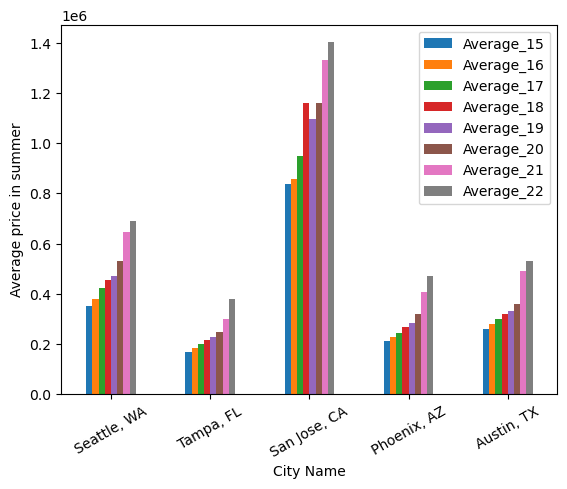

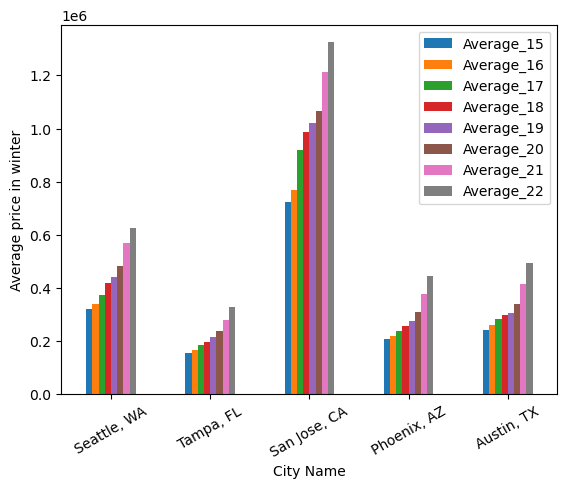

In [28]:
# bar graph showing summer and winter data
summer_data_average.plot.bar()
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("City Name")
plt.ylabel("Average price in summer")

winter_data_average.plot.bar()
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("City Name")
plt.ylabel("Average price in winter")

plt.show()

In [ ]:
# plt.style.use("fivethirtyeight")
# plt.figure(figsize=(15, 10))
# plt.bar(summer_data_average.index, summer_data_average["Average_15"], width=0.5)

# plt.xticks(rotation=30, horizontalalignment="center")
# plt.xlabel("City Name")
# plt.ylabel("Average price in summer")
# plt.show()

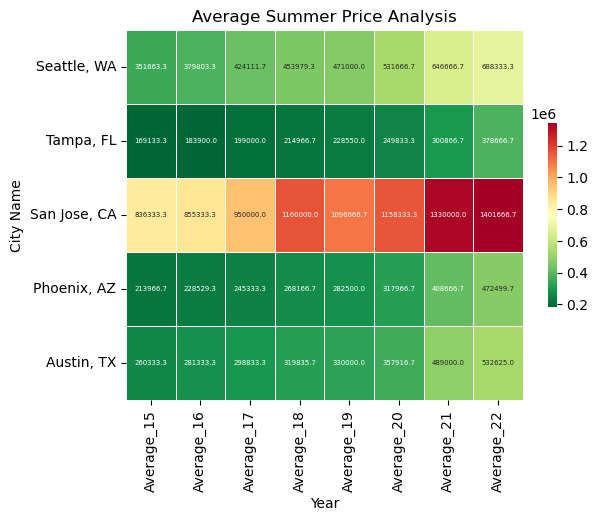

In [29]:
#summer price heat map
ax = sns.heatmap(summer_data_average, cmap='RdYlGn_r',
                 robust=True, fmt='.1f',
                 annot=True, linewidths=.6,
                 annot_kws={'size':5},
                 cbar_kws={'shrink':.5
                           })
plt.title('Average Summer Price Analysis')
plt.xlabel('Year')
plt.ylabel('City Name')
plt.show()

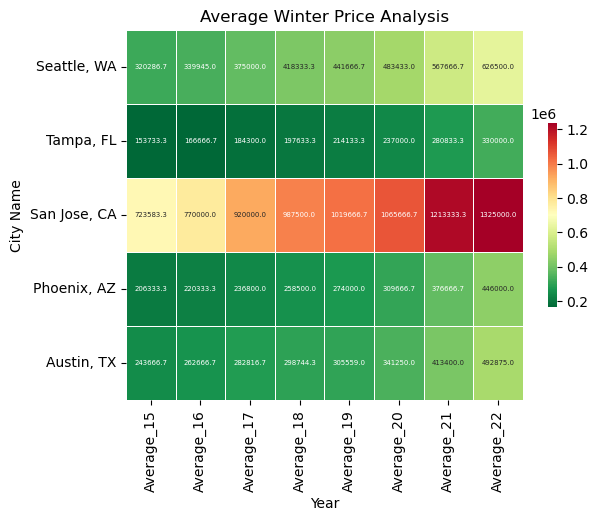

In [30]:
ax = sns.heatmap(winter_data_average, cmap='RdYlGn_r',
                 robust=True, fmt='.1f',
                 annot=True, linewidths=.6,
                 annot_kws={'size':5},
                 cbar_kws={'shrink':.5
                           })
plt.title('Average Winter Price Analysis')
plt.xlabel('Year')
plt.ylabel('City Name')
plt.show()